# SkillCorner Open Data + kloppy

## Exploratory Data Analysis
#### by Ana De Souza

- Using Skillcorner broadcast tracking data, we will create a model that identifies corner kick situations and use it to deliver analytical insights to the coaching staff in the context of opposition analysis.
- To load the data, we will utilize "kloppy," a Python package that addresses the challenges posed by the variety of data formats and aims to be the fundamental building block for processing soccer tracking and event data by pysport.
- Additionally, we will conduct exploratory data analysis to familiarize ourselves with the data source as this is our first time using Skillcorner.
- For the datasets, we will utilize the available matches in the SkillCorner opendata: 2068, 2269, 2417, 2440, 2841, 3442, 3518, 3749, and 4039.
- In conclusion, we will attempt to plot the data in app form to extract and provide actionable insights to improve team performance and decision-making during corner kick situations.

#### **Importing Libraries**

In [1]:
#pip install kloppy 

In [2]:
from kloppy import skillcorner
import pandas as pd

#### **Loading the Dataset**

In [3]:
dataset = skillcorner.load(
    meta_data="https://raw.githubusercontent.com/SkillCorner/opendata/master/data/matches/2068/match_data.json",
    raw_data="https://raw.githubusercontent.com/SkillCorner/opendata/master/data/matches/2068/structured_data.json",
    sample_rate=1/10,
    limit=100,
    coordinates="skillcorner",
    include_empty_frames=False
)

df = dataset.to_pandas()

/var/folders/jy/6vkdbscx6wl2sl46c29t4l1h0000gn/T/ipykernel_53921/2560354770.py:10: DeprecationWarning: Call to deprecated function to_pandas (to_pandas will be removed in the future. Please use to_df instead.).
  df = dataset.to_pandas()


#### **View the first and the last 5 rows of the dataset**

In [4]:
df.head()

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,home_37_x,home_37_y,...,home_anon_322_d,home_anon_322_s,away_anon_322_x,away_anon_322_y,away_anon_322_d,away_anon_322_s,home_anon_327_x,home_anon_327_y,home_anon_327_d,home_anon_327_s
0,1,0.0,1833,None,NaN,NaN,NaN,NaN,-22.432314,7.830066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1843,None,139.0,15.242770,0.569062,0.135426,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2.0,1853,None,139.0,15.885584,0.776744,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3.0,1863,None,139.0,4.981162,1.476464,4.850837,-24.414745,3.478708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4.0,1873,None,139.0,NaN,NaN,NaN,-27.298623,0.736441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,home_37_x,home_37_y,...,home_anon_322_d,home_anon_322_s,away_anon_322_x,away_anon_322_y,away_anon_322_d,away_anon_322_s,home_anon_327_x,home_anon_327_y,home_anon_327_d,home_anon_327_s
95,1,138.0,3213,None,145.0,-15.329993,-5.856413,NaN,-8.410426,12.295932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1,139.0,3223,None,145.0,-16.163115,-2.227213,NaN,-10.516237,14.669300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1,140.0,3233,None,145.0,-12.448562,10.350243,2.902440e-16,-10.627932,15.334351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1,142.0,3253,None,145.0,NaN,NaN,NaN,-10.697177,18.053226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,1,143.0,3263,None,145.0,-4.743003,27.022774,1.131683e-01,-12.764154,22.291986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
- It appears that we have data on the team in possession, identified by ID, as well as ball data in XYZ format indicating its position on the field, along with its height
- We can see there are only 100 rows in this dataset set that goes up to the 143 second
- 143 seconds is roughly 2:23
- We can explore converting the clock to mm:ss format for better visual

#### **Converting timestamps in mm:ss format**

In [6]:
def convert_to_mmss(seconds):
    minutes = int(seconds // 60)
    remaining_seconds = int(seconds % 60)
    return '{:02d}:{:02d}'.format(minutes, remaining_seconds)

df['timestamp'] = df['timestamp'].apply(convert_to_mmss)

In [7]:
df.head()

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,home_37_x,home_37_y,...,home_anon_322_d,home_anon_322_s,away_anon_322_x,away_anon_322_y,away_anon_322_d,away_anon_322_s,home_anon_327_x,home_anon_327_y,home_anon_327_d,home_anon_327_s
0,1,00:00,1833,None,NaN,NaN,NaN,NaN,-22.432314,7.830066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00:01,1843,None,139.0,15.242770,0.569062,0.135426,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:02,1853,None,139.0,15.885584,0.776744,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,00:03,1863,None,139.0,4.981162,1.476464,4.850837,-24.414745,3.478708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,00:04,1873,None,139.0,NaN,NaN,NaN,-27.298623,0.736441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Understand the shape of the dataset**

In [8]:
df.shape

(100, 160)

**Observations**
- There are 100 rows and 160 columns
- The abundance of columns could indicate the number of off the ball players, including the ball 

#### **Check the data types of the columns in the dataset**

In [9]:
df.info

<bound method DataFrame.info of     period_id timestamp  frame_id ball_state  ball_owning_team_id     ball_x  \
0           1     00:00      1833       None                  NaN        NaN   
1           1     00:01      1843       None                139.0  15.242770   
2           1     00:02      1853       None                139.0  15.885584   
3           1     00:03      1863       None                139.0   4.981162   
4           1     00:04      1873       None                139.0        NaN   
..        ...       ...       ...        ...                  ...        ...   
95          1     02:18      3213       None                145.0 -15.329993   
96          1     02:19      3223       None                145.0 -16.163115   
97          1     02:20      3233       None                145.0 -12.448562   
98          1     02:22      3253       None                145.0        NaN   
99          1     02:23      3263       None                145.0  -4.743003   

       

In [10]:
df.dtypes

period_id                int64
timestamp               object
frame_id                 int64
ball_state              object
ball_owning_team_id    float64
                        ...   
away_anon_322_s        float64
home_anon_327_x        float64
home_anon_327_y        float64
home_anon_327_d        float64
home_anon_327_s        float64
Length: 160, dtype: object

In [11]:
df.duplicated().sum()

0

In [12]:
df['ball_state'].value_counts()

Series([], Name: ball_state, dtype: int64)

In [13]:
df['ball_owning_team_id'].value_counts()

145.0    50
139.0    49
Name: ball_owning_team_id, dtype: int64

**Observations**
- As expected, we will be dealing with missing data because of coordinates of those players off the ball
- Ball state and timestamp are categorized as an "object", but looks like it has no data in bal state
- We do not have any duplicated rows nor columns
- There are two teams, one with ID 145 with 50 actions and ID 139 with 49 actions

#### **Pitch Dimensions**

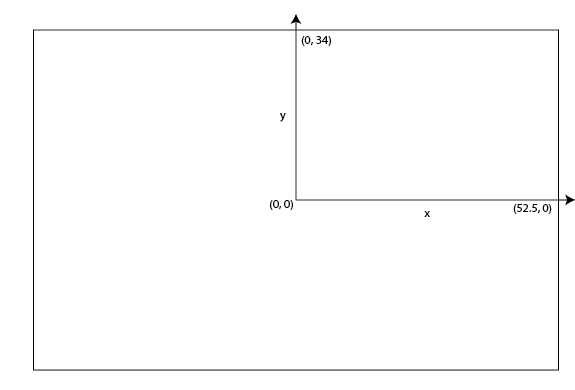

In [14]:
from IPython.display import Image

Image(filename='field.jpg', width=400, height=300)

**Observations**
- The center of the pitch is (0,0)
- The corner coordinates are (52.5,34), (52.5,-34), (-52.5,34), and (-52.5,-34)

#### **Describing the location of the ball**

In [15]:
df['ball_x'].describe()

count    79.000000
mean     -4.291565
std      21.916830
min     -39.244988
25%     -20.982475
50%     -10.383167
75%      13.284915
max      48.677484
Name: ball_x, dtype: float64

In [16]:
df['ball_y'].describe()

count    79.000000
mean     -7.396714
std      20.046334
min     -34.899497
25%     -23.690042
50%     -16.489830
75%       8.509126
max      32.790479
Name: ball_y, dtype: float64

**Observations**
- The max for ball_x is 48.677484 and min is -39.244988 meaning there were no goals scored or might have not gone out for a goalkick/corner kick in our dataset
- The max for ball_y is 32.790479 and min is -34.899497 meaning the ball never came out for a throw in on the top of our pitch/left side of the pitch in our dataset

#### **Exporting to CSV to see the all the columns**

In [17]:
#df.to_csv('skillcorner.csv', index=False)

#### **Filtering for certain conditions to identify a corner kick**

In [18]:
filtered_df = df[(df['ball_x'] < -52) | (df['ball_x'] > 52) |
        (df['ball_y'] < -33) | (df['ball_y'] > 33)
    ]
filtered_df.sort_values('ball_x', ascending=False)

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,home_37_x,home_37_y,...,home_anon_322_d,home_anon_322_s,away_anon_322_x,away_anon_322_y,away_anon_322_d,away_anon_322_s,home_anon_327_x,home_anon_327_y,home_anon_327_d,home_anon_327_s
88,1,02:03,3063,None,145.0,11.392073,-34.899497,NaN,35.518485,-5.243791,...,NaN,NaN,35.06367,1.722366,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

- We cannot find a point that is nearly close to the corner coordinates: (52.5, 34), (52.5, -34), (-52.5, 34), and (-52.5, -34).
- Numerically, it looks like only ball that went out from the touchline was for a corner based on the coordinates (11.392073, -34.899497)

Next steps, to try to built a model that will identify a corner kick numerically and visualize the frame and provide an analysis for coaches/performance analysts in app form. To conclude, we will also provide general points of analysis in order to analyze a corner, if such action were available in these datasets.